Stochastic Optimization demo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

I apply stochastic optimization to the simple 1D problem of minimizing $Bx^2$. With step size h, this results in the gradient descent step:

$$x_i = (1-hB)x_{i-1}$$

The statistical model used for the x iterates is:

$$x_i = \mu + A(x_{i-1} - \mu) + Z_i$$ 

where $\mu$ is the optimal value of x (which is 0) and $Z_i$ is Gaussian noise. It would make sense that as our posterior updates continually, the mean for $\mu$ should converge to 0, and the mean of $A$ should converge to $1-hB$. Both variances should decrease as we receive more data.

I maintain a dictionary containing the iterates for x, mu, A and Sigma (I don't actually update Sigma in the code below, just keep it constant). mu, A and Sigma are all N\*2 numpy arrays with the first column being the sequence of means for the parameter and the second the sequence of variances.

In [28]:
def Optimize(B, prior_mu, prior_A, prior_sigma, num_iterations, h):
    
    Iterates_dict = {}
    Iterates_dict["x"] = np.zeros(num_iterations)
    Iterates_dict["x"][0] = -1
    Iterates_dict["mu"] = np.zeros((num_iterations, 2))
    Iterates_dict["mu"][0] = prior_mu
    Iterates_dict["A"] = np.zeros((num_iterations, 2))
    Iterates_dict["A"][0] = prior_A
    Iterates_dict["Sigma"] = np.zeros((num_iterations, 2))
    Iterates_dict["Sigma"][0] = prior_sigma
    
    #dump first few iterates
    for i in range(1, 20):
        x_prev = Iterates_dict["x"][0]
        Iterates_dict["x"][0] = x_prev - h*(12*x_prev**5 + 15*x_prev**4 - 4*x_prev**3 - 15*x_prev**2 -8*x_prev + 3)
        
    
    for i in range(1, num_iterations):
        x_prev = Iterates_dict["x"][i-1]
        x_curr = x_prev - h*(12*x_prev**5 + 15*x_prev**4 - 4*x_prev**3 - 15*x_prev**2 -8*x_prev + 3)
        Iterates_dict["x"][i] = x_curr
        
        mu = Iterates_dict["mu"][i-1]
        A = Iterates_dict["A"][i-1]
        Sigma = Iterates_dict["Sigma"][i-1]
        Iterates_dict["mu"][i] = mu
        Iterates_dict["A"][i] = A
        Iterates_dict["Sigma"][i] = (prior_sigma[0]*np.exp(-i*0.01), 0) #decay
        
        # Switch between updating mu and updating A. First line is posterior mean update, second line is posterior variance
        # update.
        Iterates_dict["mu"][i, 0] = (Sigma[0]*mu[0] + mu[1]*A[1]*x_prev + mu[1]*(1-A[0])*(x_curr - A[0]*x_prev))/(Sigma[0]+mu[1]*A[1]+mu[1]*(1-A[0])**2)
        Iterates_dict["mu"][i, 1] = (mu[1]*Sigma[0])/(Sigma[0]+mu[1]*A[1]+mu[1]*(1-A[0])**2)
        mu = Iterates_dict["mu"][i]
        
        Iterates_dict["A"][i, 0] = (Sigma[0]*A[0] + A[1]*mu[1] + A[1]*(x_prev-mu[0])*(x_curr-mu[0]))/(Sigma[0]+A[1]*mu[1]+A[1]*(x_prev-mu[0])**2)
        Iterates_dict["A"][i, 1] = (A[1]*Sigma[0])/(Sigma[0]+A[1]*mu[1]+A[1]*(x_prev-mu[0])**2)
            
    return Iterates_dict

In [29]:
B = np.random.uniform(0, 1) # optimization objective is B(x-0.1)^2
B = 1
h = 0.13
Iterates = Optimize(B, (-1.0, 0.5), (1, 0.5), (0.5, 0.5), 100, h) #Priors of mean 0.5, variance 0.5 on all parameters.

We can see how the iterates for x (gradient descent), $\mu$ and $A$ (posterior updating) vary:

In [30]:
print(Iterates["x"])
print(Iterates["mu"])
print(Iterates["A"])
print(Iterates["Sigma"])

[ 0.00911528 -0.37124243 -0.9312285  -1.39258122 -0.01707522 -0.42426765
 -0.98594943 -1.39338821 -0.010094   -0.41039363 -0.97187429 -1.39520242
  0.00569232 -0.37832439 -0.93869434 -1.39386433 -0.00596333 -0.40209596
 -0.96338062 -1.39558009  0.00899455 -0.37149298 -0.93149357 -1.39263249
 -0.01663242 -0.42339324 -0.98506676 -1.39354725 -0.00871523 -0.40763131
 -0.96905329 -1.39538593  0.00729614 -0.37501187 -0.93520905 -1.39330717
 -0.01079624 -0.41179772 -0.97330575 -1.39508682  0.00468263 -0.38040463
 -0.94087712 -1.39417527 -0.00326101 -0.39663175 -0.95775409 -1.3955478
  0.00871205 -0.37207907 -0.93211335 -1.39275075 -0.01561072 -0.42137276
 -0.983025   -1.39389146 -0.00572775 -0.40162073 -0.96289234 -1.39558606
  0.00904682 -0.37138451 -0.93137882 -1.39261035 -0.01682368 -0.42377102
 -0.98544818 -1.39347929 -0.00930455 -0.4088129  -0.97026077 -1.39531454
  0.00667205 -0.37630205 -0.93656792 -1.3935332  -0.00883703 -0.40787564
 -0.96930307 -1.39537203  0.00717467 -0.3752631  -0.

And plot how the posterior mean for $\mu$ changes:

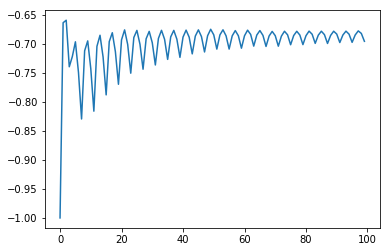

In [31]:
plt.plot(Iterates["mu"][:, 0])

We can also check whether the iterates for $A$ converge to $1-hB$:

In [105]:
1-h*B

-0.6000000000000001

Note: Changing the initial priors seems to affect the behaviour greatly. 

In [89]:
(1-h*B)*0.5

0.32264172007507835

In [ ]:
#Changelist:
#fixed B, h
#different objective/x updates
#decay